# Clustering

One of the most common use cases in unsupervised machine learning is the identification of clusters - discrete groups of samples which are somehow closer related to samples within the same cluster than they are with those outside. Once we abstract our data in to a general *d*-dimensional space of N samples, we can quickly start to apply our intuition to how to determine cluster membership. 

### Learning motivation / points to consider

- You may be wondering which clustering algorithm is the best to find "natural subgroups" in your data?
- Well, the nature of the data will answer that question. 
- For example, a large dataset could preclude computationally intensive algorithms (e.g hierarchical clustering or affinity propagation). 
- Is anything known about the underlying structure (e.g. globular versus non-globular)? 
- Are you looking for a specific number of clusters? 
- So, unfortunately, you need to have various algorithms in your toolbox, ready to deploy as the circumstances dicate 

- (or **you could just use k-means for everything**).

In [1]:
import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

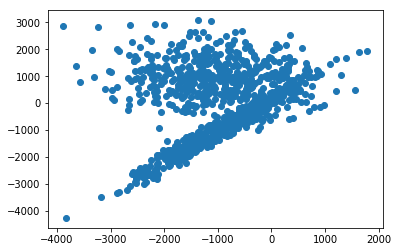

In [2]:
from IPython.display import Image
Image(filename='./assets/scatter-2d.png', width=500)

**If you were to manually group the data in the above graph, how would you do it?**<br>
    You might draw two circles, like this:

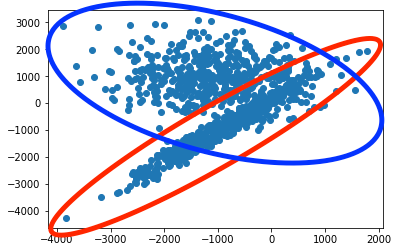

In [3]:
Image(filename='./assets/scatter-2d-circled.png', width=500)

And this is what we obtain using an appropriate clustering algorithm (e.g. Gaussian mixture model).

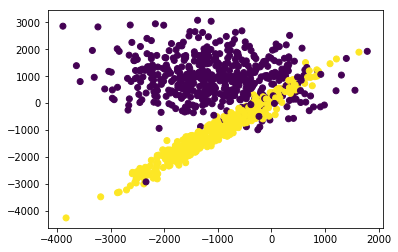

In [4]:
Image(filename='./assets/scatter-2d-segments.png', width=500)

But before delving into advanced models like GMM, we have to introduce the basics.

### K-Means clustering

This is the most fundamental clustering algorithm. 

<img src="assets/KMeans_animation.gif" style="float:left"/>

Assuming we know *a priori* the number of clusters (k), the algorithm starts by placing k coordinates (centroides c) in the feature space. First all samples are assigned to their closest centroid. Once assigned, we update the centroid location as the mean of all the samples belonging to it. These steps are allowed to continue until convergence.

In [3]:
# import few libraries
from sklearn.datasets import make_blobs # to generate dataset
from sklearn.cluster import KMeans   # clustering algorithm

In [4]:
# create 1000 points on 4 clusters
X, y = make_blobs(n_samples=200, centers=4,random_state=42, cluster_std=1.5)

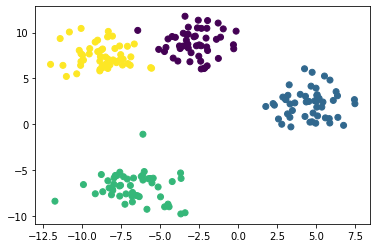

In [5]:
# visualize the example data
def scatter(X, y=None, ax=plt):
    ax.scatter(X[:,0], X[:,1], c=y)
scatter(X,y)

### The scikit-learn workflow
- initialize model
- fit ("train") model
- predict using model

In [6]:
# initialize model
model = KMeans(4, random_state=0)

In [7]:
# train model 
model.fit(X)

KMeans(n_clusters=4, random_state=0)

In [8]:
# predict target values (classes)
y = model.predict(X)
y

array([2, 3, 3, 3, 0, 0, 2, 3, 2, 0, 0, 2, 2, 0, 0, 0, 1, 3, 0, 0, 0, 0,
       3, 1, 3, 1, 1, 0, 1, 2, 0, 0, 3, 3, 1, 2, 3, 2, 3, 1, 0, 1, 0, 0,
       3, 2, 2, 0, 2, 1, 3, 1, 3, 2, 1, 1, 0, 0, 1, 2, 3, 2, 0, 3, 3, 0,
       2, 1, 3, 1, 1, 3, 1, 0, 2, 0, 2, 1, 0, 1, 1, 2, 0, 3, 3, 3, 3, 1,
       2, 3, 0, 1, 2, 2, 2, 3, 1, 2, 0, 1, 3, 3, 1, 0, 1, 2, 3, 0, 0, 3,
       2, 0, 1, 3, 1, 3, 3, 1, 1, 1, 3, 0, 2, 3, 3, 2, 1, 2, 2, 1, 0, 0,
       1, 3, 3, 2, 0, 0, 1, 0, 2, 1, 3, 2, 2, 1, 2, 3, 0, 0, 1, 3, 2, 3,
       0, 3, 3, 2, 2, 2, 1, 2, 2, 3, 1, 0, 2, 2, 0, 2, 3, 1, 0, 0, 2, 0,
       2, 1, 1, 0, 1, 0, 3, 3, 3, 1, 2, 2, 2, 1, 1, 0, 3, 3, 1, 3, 2, 1,
       0, 2])

The model here is itself a python *object*, and can thus have certain attributes, such as the centroids locations:

In [9]:
centroids = model.cluster_centers_
centroids

array([[-6.69118023, -6.89411831],
       [-2.72328916,  8.8186043 ],
       [ 4.55617572,  2.22813176],
       [-8.66066413,  7.5046551 ]])

In [10]:
# Make a function for common plot formatting
def format_plot(ax, title):
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xlabel('feature 1', color='black')
    ax.set_ylabel('feature 2', color='black')
    ax.set_title(title, color='black')

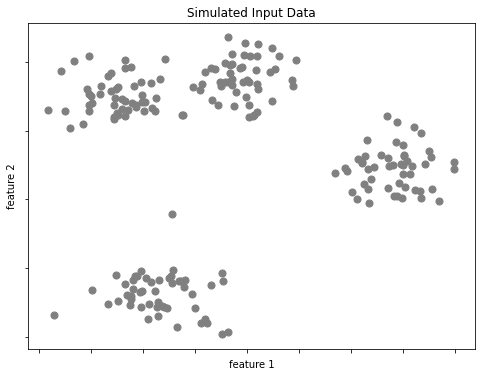

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, color='gray')

# format the plot
format_plot(ax, 'Simulated Input Data')

plt.show()
# fig.savefig('assets/k-means-clustering-1.png')

#### Exercise 1.Plot the data with color-coded cluster labels and star-shaped cluster centroids

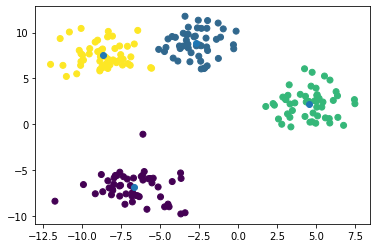

In [17]:
plt.subplots()
scatter(X, y)
scatter(centroids)

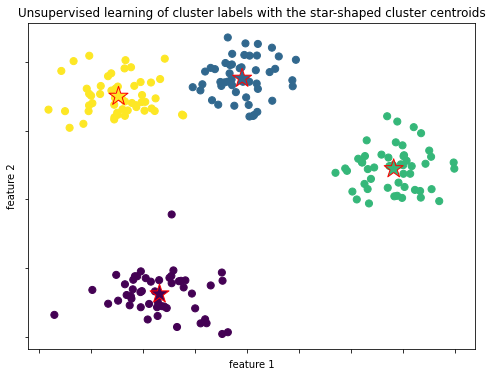

In [15]:
# %load solutions/ex2_1.py

#example of a solution
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='viridis')
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=400, c=range(4), cmap='viridis', edgecolors = 'red')

# format the plot
format_plot(ax, 'Unsupervised learning of cluster labels with the star-shaped cluster centroids')

plt.show()

### Visualizing K-means clusters in 3D using the interactive tool  [`plotly`](https://github.com/plotly/plotly.py)
Plotly is an interactive, open-source, and browser-based graphing library for Python.

The above plots were created by clustering two attribute columns, only. There could have been other columns in our data set, but we just used two columns. If we want to use an additional column as a clustering feature we would want to visualize the cluster over three dimensions. <br>Here is an example that shows how to visualize cluster shapes with a 3D scatter/mesh plot in a Jupyter notebook using [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) to generate data and plotly for visualization.

In [64]:
# Initialize plotting library and functions for 3D scatter plots 
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_classification, make_regression
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()

def rename_columns(df, prefix='x'):
    """
    Rename the columns of a dataframe to have X in front of them

    :param df: data frame we're operating on
    :param prefix: the prefix string
    """
    df = df.copy()
    df.columns = [prefix + str(i) for i in df.columns]
    return df

In [65]:
# Create an artificial dataset with 3 clusters for 3 feature columns
# cf. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html
X, Y = make_classification(n_samples=100, n_classes=3, n_features=3, n_redundant=0, n_informative=3,
                             scale=1000, n_clusters_per_class=1)
df = pd.DataFrame(X)
# rename X columns
df = rename_columns(df)
# and add the Y
df['y'] = Y
df.head(3)

x0           x1           x2  y
0 -3538.459443  3257.576428  1153.599685  1
1  1528.508914  -804.495460 -2622.802322  2
2    71.576062  1960.644244   165.122849  1

In [66]:
# You are not expected to understand this code
# Visualize cluster shapes in 3D

cluster1=df.loc[df['y'] == 0]
cluster2=df.loc[df['y'] == 1]
cluster3=df.loc[df['y'] == 2]

scatter1 = dict(
    mode = "markers",
    name = "Cluster 1",
    type = "scatter3d",    
    x = cluster1.values[:,0], y = cluster1.values[:,1], z = cluster1.values[:,2],
    marker = dict( size=2, color='green')
)
scatter2 = dict(
    mode = "markers",
    name = "Cluster 2",
    type = "scatter3d",    
    x = cluster2.values[:,0], y = cluster2.values[:,1], z = cluster2.values[:,2],
    marker = dict( size=2, color='blue')
)
scatter3 = dict(
    mode = "markers",
    name = "Cluster 3",
    type = "scatter3d",    
    x = cluster3.values[:,0], y = cluster3.values[:,1], z = cluster3.values[:,2],
    marker = dict( size=2, color='red')
)
cluster1 = dict(
    alphahull = 5,
    name = "Cluster 1",
    opacity = .1,
    type = "mesh3d",    
    x = cluster1.values[:,0], y = cluster1.values[:,1], z = cluster1.values[:,2],
    color='green', showscale = True
)
cluster2 = dict(
    alphahull = 5,
    name = "Cluster 2",
    opacity = .1,
    type = "mesh3d",    
    x = cluster2.values[:,0], y = cluster2.values[:,1], z = cluster2.values[:,2],
    color='blue', showscale = True
)
cluster3 = dict(
    alphahull = 5,
    name = "Cluster 3",
    opacity = .1,
    type = "mesh3d",    
    x = cluster3.values[:,0], y = cluster3.values[:,1], z = cluster3.values[:,2],
    color='red', showscale = True
)
layout = dict(
    title = 'Interactive Cluster Shapes in 3D',
    scene = dict(
        xaxis = dict( zeroline=True ),
        yaxis = dict( zeroline=True ),
        zaxis = dict( zeroline=True ),
    )
)
fig = dict( data=[scatter1, scatter2, scatter3, cluster1, cluster2, cluster3], layout=layout )
# Use py.iplot() for IPython notebook
plotly.offline.iplot(fig, filename='mesh3d_sample')

### Another example

In [67]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3],
     ])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

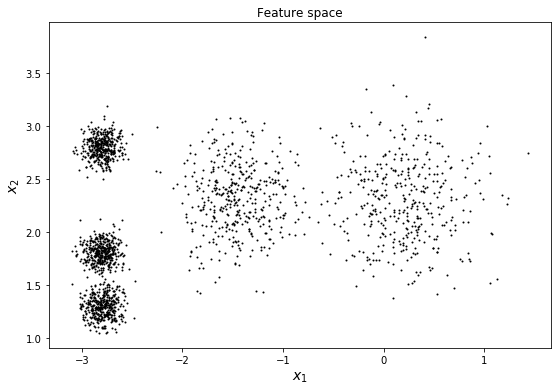

In [68]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=42)

def plot_clusters(X, y=None):
    if y==None:
        plt.scatter(X[:, 0], X[:, 1], c='k', s=1)
    else:
        plt.scatter(X[:, 0], X[:, 1], c=y, s=1)        
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=90)
    
plt.figure(figsize=(9, 6))
plot_clusters(X)
plt.title('Feature space')
plt.show()

In [69]:
K = 5
kmeans = KMeans(n_clusters=K, random_state=42)
y_pred = kmeans.fit_predict(X)

In [70]:
y_pred is kmeans.labels_

True

Count the cardinality of each cluster:

In [71]:
# Using np.bincount()
print(len(y_pred))
print(y_pred)
np.bincount(y_pred)

2000
[2 3 1 ... 3 2 4]


array([401, 403, 403, 392, 401], dtype=int64)

### Visualizing the decision boundaries -  _Voronoi_ diagrams

In [72]:
# don't worry about this code

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=90)
    else:
        plt.tick_params(labelleft=False)

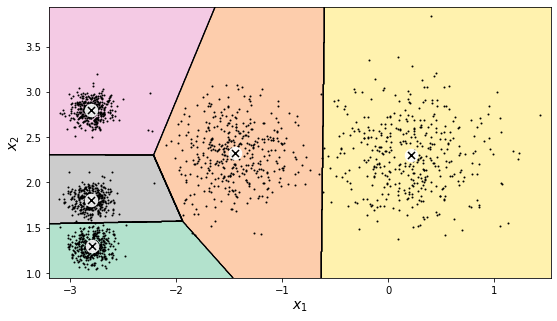

In [73]:
plt.figure(figsize=(9, 5))
plot_decision_boundaries(kmeans, X)

plt.show()

Looking at this Voronoi plot, we understand that we can assign labels to new *unseen* datapoints if we so wish.

In [74]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=3, n_clusters=5,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=1,
       tol=0.0001, verbose=0)

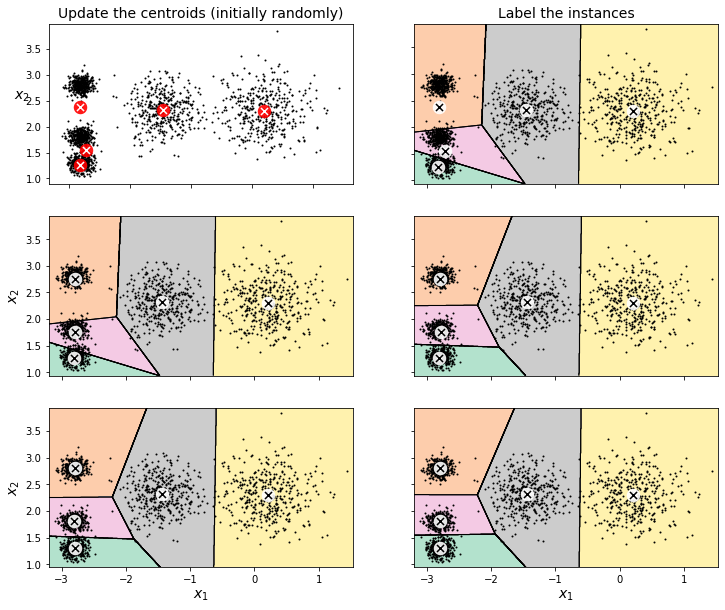

In [75]:
plt.figure(figsize=(12, 10))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()


### Extra exercise: implement KMeans  from scratch (optional)

Tip: make two functions `assign` and `update`, and one master function `km` which calls the other two functions in a loop until convergence. It can also be helpful to make a function `distance` which computes the euclidian distances between points.

#### Pseudocode for the master function
```python
def km(X, n):
    while not converged:
        y = assign()
        update()
    return y
```

If you are comfortable with OOP, you could make a class `KMeans` instead, which supports that process. 

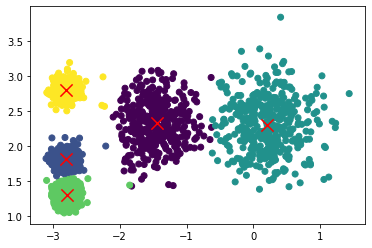

In [76]:
# %load solutions/ex2_extra.py

# one possible solution
# if it yields a bad result, rerun code

class KM():
    def __init__(self, k):
        self.k = k     
        
    def distances(self, X): 
        """Makes a distance matrix to the centroids of shape (n_samples x n_centroids)"""
        return np.vstack([np.sum((X-self.centroids[i,:])**2, axis=1) for i in range(self.k)]).T
    
    def assign(self, X): 
        """Selects the index of the distance matrix which has the smallest entry"""
        dist = self.distances(X)
        return np.argmin(dist, axis=1)
  
    def update(self, X):
        """Updates centroid to mean of its constituents. If it has no constituents, respawn randomly"""
        for j in range(self.k):
            new_c = X[self.y==j,:].mean(axis=0)
            if np.any(np.isnan(new_c)): 
                self.centroids[j,:] = np.random.uniform(X.min(0), X.max(0), X.shape[1])        
            else: self.centroids[j, :] = new_c

    def __call__(self, X):
        n, d = X.shape
        self._converged = False
        self.centroids = X[np.random.randint(0,n, self.k), :] # initialize by random selection of samples
        self.y = np.zeros(shape=n) # empty initialize
        
        while True: #repeat until convergence
            #old_centroids = self.centroids 
            old_y = self.y
            self.y = self.assign(X)
            if np.all(self.y == old_y): return self.y
            self.update(X)        
        return self.y


km = KM(5)
y = km(X)


plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(km.centroids[:,0], km.centroids[:,1], marker='x', s=150, c='red')

## How to determine k
Setting the wrong number of centroids will obviously be detrimental. You might be tempted to argue: we can just eyeball the data to determine the appropriate number. The problem here is that data is usually of higher dimensions than 2, and if we were able to assign clusters by eye, we wouldn't need the algorithms to begin with.

See also [here](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set) and [here](https://stackoverflow.com/questions/15376075/cluster-analysis-in-r-determine-the-optimal-number-of-clusters/15376462#15376462)

In [77]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

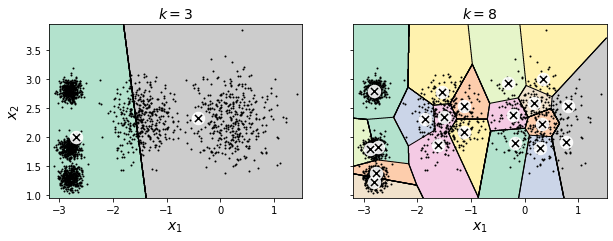

In [78]:
kmeans_k3 = KMeans(n_clusters=2, random_state=42)
kmeans_k8 = KMeans(n_clusters=20, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

## Solution: the silhouette score
One heuristic approach to decide on the optimal number of clusters is to look at the [_silhouette score_](https://en.wikipedia.org/wiki/Silhouette_(clustering)), which is the mean _silhouette coefficient_ over all the data samples. A sample's silhouette coefficient is equal to $(b - a)/\max(a, b)$ where $a$ is the mean distance to the other samples in the same cluster (it is the _mean intra-cluster distance_), and $b$ is the _mean nearest-cluster distance_, that is the mean distance to the samples of the next closest cluster (defined as the one that minimizes $b$, excluding the samples's own cluster). The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the sample is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the sample may have been assigned to the wrong cluster.

In [79]:
from sklearn.metrics import silhouette_score

In [80]:
silhouette_score(X, kmeans.labels_)

0.656578194104489

Is this a good or a bad score? To tell we must compare it to the alternatives.
#### Exercise 2. a) Make a list `kmeans_per_k` of models initialized and fitted with K=0,1,2,...,10, and a b) list `silhouette_scores` containing the respective silohuette scores.

In [81]:
# %load solutions/ex2_2a.py
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

In [82]:
# %load solutions/ex2_2b.py
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

#### c) make a line plot showing the silhouette score as a function of k 

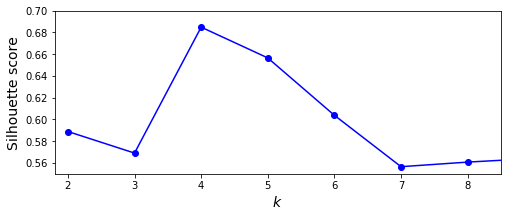

In [83]:
# %load solutions/ex2_2c.py
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

The plot tells that $k=4$ is a very good choice, but also shows that $k=5$ is quite good as well. 

### Silhouette diagrams
An even more informative visualization is given when one plot the silhouette coefficient of every sample, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a _silhouette diagram_

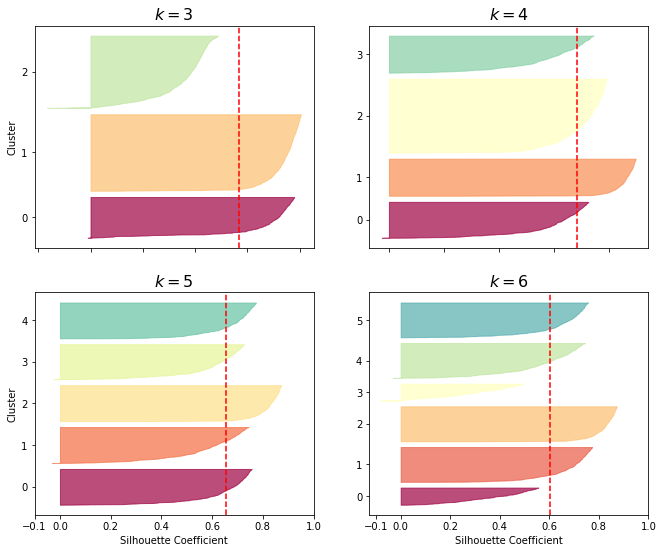

In [84]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

From these plots, it is more apparent that k=5 is a viable option.

# The danger of not scaling features

The above dataset was arbitrarily constructed so that each feature lies within about the same range. Sometimes one feature might lie in [0,1] and another on [500,1000]. When KMean is applied, what do you think will happen?

## Without scaling

Text(0.5, 1.0, 'KMeans without scaling')

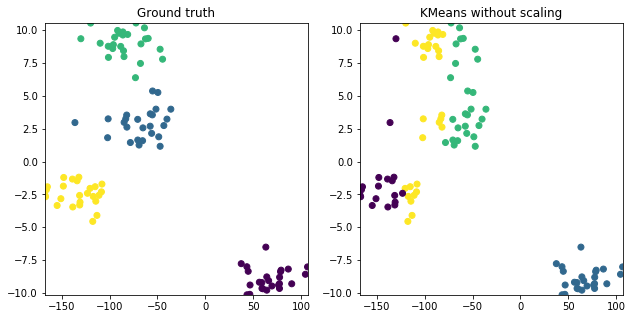

In [95]:
X,y = make_blobs(centers=4, random_state=51)
# scale one axis by 20
X=X@[[20,0],[0,1]] 
xmin,ymin,xmax,ymax = *X.min(0), *X.max(0) # the "*" just unpacks the values, not multiplication


fig = plt.figure(figsize=(16,5))

ax = fig.add_subplot(131)
plt.scatter(X[:,0],X[:,1], c=y)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.title('Ground truth')

ax = fig.add_subplot(132)
                     
# fit KMeans and predict
pred = KMeans(4).fit_predict(X)
plt.scatter(X[:,0],X[:,1], c=pred)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.title('KMeans without scaling')

This looks very different from what you probably expected. However, pay attention to the axes: the first axis is on a much larger scale, and thus this feature is considered more "important" by the algorithm. 
#### Exercise 3. Scale the data and rerun KMeans, and make an equivalent figure.
Tip: use sklearn's StandardScaler. Scalers in sklearn are used in the same syntax as other models: you must initialize it, and fit it. You can fit and transform ("predict") the data in a single step using the `fit_transform` method.

In [96]:
from sklearn.preprocessing import StandardScaler

Text(0.5, 1.0, 'KMeans with scaling')

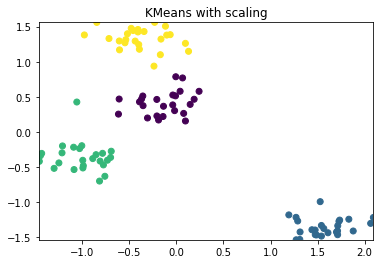

In [98]:
# %load solutions/ex2_3.py

## scale and fit on the scaled data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pred = KMeans(4).fit_predict(X_scaled)

# plotting
xmin,ymin,xmax,ymax = *X_scaled.min(0), *X_scaled.max(0) # the "*" just unpacks the values, not multiplication
plt.scatter(X_scaled[:,0],X_scaled[:,1], c=pred)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.title('KMeans with scaling')

If you solved that correctly, you will see a proper clustering of the points, illustrating the importance of feature scaling. 

## Using clustering for (color) image segmentation

It is also possible to cluster images using KMeans. Here we keep in mind that we can transform the image data into a matrix of shape (n_samples x n_features). In color images, this amount to 3 columns/features (R,G,B). Once we have transformed the image into *feature space*, we can apply clustering to the points. Later we transform the labels back into original image space, now as a compressed image. 

In [101]:
from matplotlib.image import imread

In [105]:
image = imread("assets/ladybug.png")

# the reshaping is the transformation into feature space. You can confirm it with `X.shape`
X = image.reshape(-1, 3) 
print(X.max(), X.min()) # if image is [0-255], divide X by 255 to get correct answers
print(X.shape)

1.0 0.0
(426400, 3)


In [103]:
%%time

segmented_imgs = []
n_colors = ([6, 2])

for k in n_colors:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X) # initialize and fit in one line
    recon = kmeans.cluster_centers_[kmeans.labels_].reshape(image.shape) # assign labels and transform back
    segmented_imgs.append(recon) 
    np.bincount(kmeans.labels_)

Wall time: 10.6 s


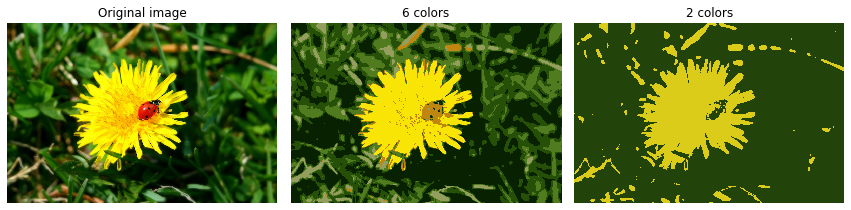

In [106]:
plt.figure(figsize=(15,7))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, k in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(k))
    plt.axis('off')

plt.show()

# Hierarchical clustering: Reconstructing the evolutionary relationship between species

Certain problems may arise  with inherent hierarchical structure and naturally lend themselves to hierarchical clustering. Ford and VolksWagen are cars, Boeing are planes, both planes and cars are motorized vehicles. Biological species is another great example: the tree of life is essentially a hierarchical heap of cluster, and modern reconstructions of evolutionary kinship is done using the basic technique you will learn here.  

Once again we don't need labeled data, as hierarchical clustering is just another example of unsupervised learning.

In [108]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist # calculates pairwise distance between points

## Hierarchical Clustering

Unlike k-means and EM, [hierarchical clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering) (HC) doesn't require the user to specify the number of clusters beforehand. Instead it returns an output (typically as a dendrogram - see GIF below), from which the user can decide the appropriate number of clusters (either manually or [algorithmically](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/)). If done manually, the user may cut the dendrogram where the merged clusters are too far apart (represented by a long lines in the dendrogram). Alternatively, the user can just return a specific number of clusters (similar to k-means).

![title](./assets/hierarch.gif)

As its name suggests, it constructs a hierarchy of clusters based on proximity (e.g Euclidean distance or Manhattan distance - see GIF below). HC typically comes in two flavours (essentially, bottom up or top down): 

* Divisive: Starts with the entire dataset comprising one cluster that is iteratively split- one point at a time- until each point forms its own cluster.
* Agglomerative: The agglomerative method in reverse- individual points are iteratively combined until all points belong to the same cluster.

Another important concept in HC is the linkage criterion. This defines the distance between clusters as a function of the points in each cluster and determines which clusters are merged/split at each step. That clumsy sentence is neatly illustrated in the GIF below.

![title](./assets/hierarch_1.gif)

## Basic concept
Here we demonstrate the basic of hierarchical clustering using a random dataset. 

Provided N data points, we first have to find a measure of similarity or distance between each observation. For continuous vectors, this is just the distance between them in feature space.  

In [109]:
# make a random data set.
stds = [1.5, 1, .8]
X, y = make_blobs(100, centers=3, random_state=11, cluster_std=stds)

The ground truth versus what the computer sees before any clustering has been done.


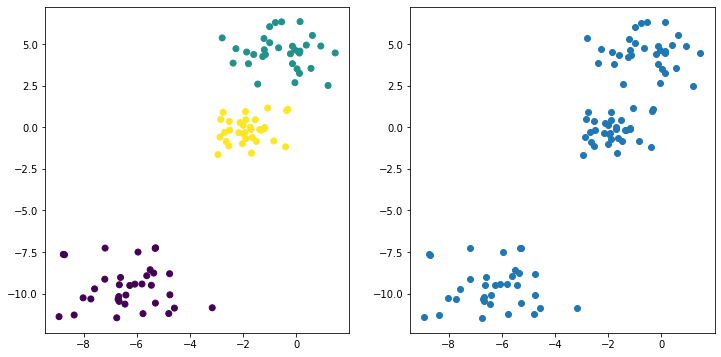

In [110]:
print("The ground truth versus what the computer sees before any clustering has been done.")

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.scatter(X[:,0], X[:,1], c = y)

plt.subplot(122)
plt.scatter(X[:,0], X[:,1])

plt.show()

We would expect the the 2 upper clusters to be closer related to eachother than to the lower cluster.

In [111]:
distance_matrix = pdist(X) #the pairwise distances between all points

##### Exercise 2.4: what is the shape of the distance matrix? Is it what you would expect?

In [113]:
# %load solutions/ex2_4.py
print(distance_matrix.shape)

# ANSWER:
#Instead of the expected 2D array (matrix), the distances are stored in a condensed
# 1D array because distances are redundant (we get 2 for each pair).
#How indexing works is dealt with behind the scenes.

# the full matrix would have shape (100, 100). 
#(100**2 - 100)/2

(4950,)


## Do the clustering

We now have the distances, and will apply **agglomerative** clustering: the individual observations are grouped together to form small clusters, starting from the most similar observations. In the next round, these clusters can be grouped together with each other, which form even larger clusters. This process continues iteratively until all observations have been connected at the same root. There are many possible ways to implement this, but we will use `linkage` from the `scipy` package. We are also given some freedom as to how new clusters form in our choice of the hyperparameter `method`.

In [114]:
# do the actual clustering using scipy's linkage
Z = hierarchy.linkage(distance_matrix, method='complete') # single, complete, average
Z.shape

(99, 4)

In [115]:
# rows = clusters
# column1 and 2 = index of points/clusters
# column3 = distance between them
# column4 = how many observations in the cluster 
Z[:5]

array([[1.20000000e+01, 1.60000000e+01, 4.17937590e-02, 2.00000000e+00],
       [8.20000000e+01, 8.30000000e+01, 5.13771542e-02, 2.00000000e+00],
       [7.40000000e+01, 8.00000000e+01, 6.48958345e-02, 2.00000000e+00],
       [1.00000000e+00, 3.20000000e+01, 6.51479339e-02, 2.00000000e+00],
       [2.80000000e+01, 5.00000000e+01, 6.63901058e-02, 2.00000000e+00]])

Let's inspect the two closest observations:

In [116]:
closest_points = Z[0][:2].astype(int)
print('The closest points are at index')
closest_points

The closest points are at index


array([12, 16])

Let's plot it for the sake of illustration.

-7.305977885266081 -3.3059778852660813 -9.286887720189828 -5.286887720189828


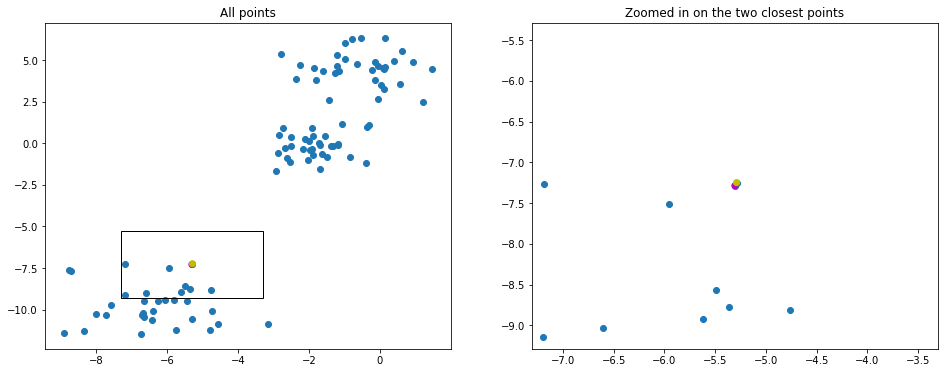

In [117]:
from matplotlib.patches import Rectangle

idxs=closest_points

xmin, ymin, xmax, ymax = *(X[idxs[0]]-2), *(X[idxs[0]]+2)
print(xmin, xmax, ymin, ymax)

plt.figure(figsize=(16,6))
ax =  plt.subplot(121)
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[idxs,0], X[idxs,1], c=['m','y'])
plt.title('All points')

w, h = xmax-xmin, ymax-ymin
bb = Rectangle((xmin, ymin), w, h, fill=False)
ax.add_patch(bb)

plt.subplot(122)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[idxs,0], X[idxs,1], c=['m','y'])
plt.title('Zoomed in on the two closest points')

plt.show()

### Plot a dendrogram

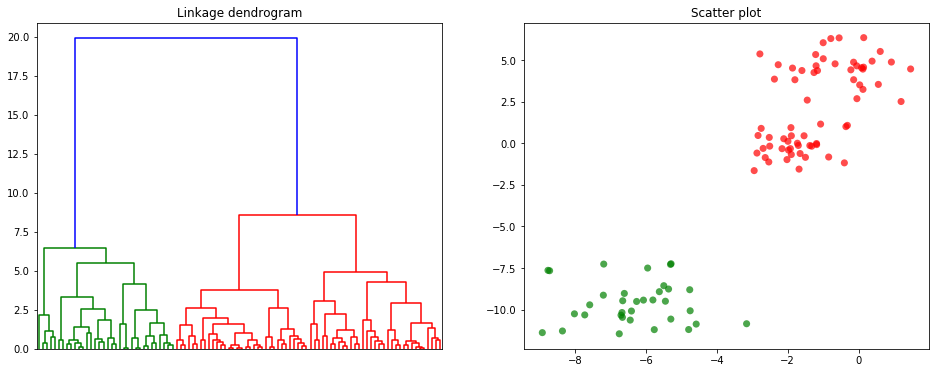

In [129]:
plt.figure(figsize=(16,6))

# Dendrogram
plt.subplot(121)
R = hierarchy.dendrogram(Z, color_threshold=9, show_leaf_counts=False, no_labels=True) # plot dendrogram
plt.title('Linkage dendrogram')


# Scatter plot
t = 2# the number of clusters we want to display
cluster_labels = hierarchy.fcluster(Z, t, criterion='maxclust') 

# map label to color
l2c = lambda k : "grcmyk"[(k-1)%6]
cluster_colors = [l2c(l) for l in cluster_labels]


plt.subplot(122)
#colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / t)
plt.scatter(X[:, 0], X[:, 1], marker='.', s=200, lw=0, alpha=0.7, c=cluster_colors)
plt.title('Scatter plot')
plt.show()

To obtain the cluster labels we need to use another function `fcluster` on the linking matrix `Z`.

In [122]:
cluster_labels = hierarchy.fcluster(Z, t, 'maxclust')

In [123]:
cluster_labels

array([1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2,
       2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2], dtype=int32)

#### Exercise 5: Experiment with varying the `color_threshold` in the dendrogram, and `t` in `f_cluster`, and find which clusters in the scatter plot the observations correspond to. 
**Note:** `t` is the number of clusters, while `color_threshold` is a little tricky.

In [131]:
# %load solutions/ex2_5.py

# ANSWER:
# a few values that work together for (color_threshold, t) pairs are
# (20, 1); (15,2); (8,3); (6,4); (5,5); (3,11)


#### Exercise 6. What number of "flat" clusters do you think is most appropriate for this dendrogram? Answer by calculating and plotting the silhouette score for a few values (say 2-9). Does it correspond with your intuition?

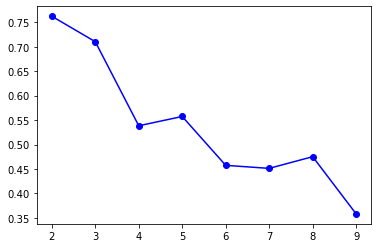

In [132]:
# %load solutions/ex2_6.py
silhouette_scores = [silhouette_score(X, hierarchy.fcluster(Z, t, 'maxclust'))
                     for t in [2,3,4,5,6,7,8,9]]
plt.plot(range(2, 10), silhouette_scores, "bo-")

In [133]:
# ignore
#cl = R['color_list']
#lvs = R['leaves']
#ivl = R['ivl']
#icoord = R['icoord']
#dcoord = R['dcoord']
#prnt(cl)
#prnt(lvs)
#prnt(ivl)
#print(len(cl), len(ls))
#
#pair = lambda k,i : np.array([icoord[k][i], dcoord[k][i]])
#
#def kth(k):
#    return pair(k,0) - pair(k,1) - pair(k,2) - pair(k,3)
#    
#ks = np.array([kth(k) for k in range(99)])*[1, -1] #flip it
#
#plt.scatter(ks[:,0], ks[:,1], s=100, c='k', marker='+')

### Problem: How can we determine the "distance" between strings of letters (e.g. amino acid sequences)?

Now that we have introduced hierarchical clustering as a framework to construct phylogenetic trees, how can we quantify distance between amino acids? 

### Answer: the Levenshtein distance

An algorithm used specifically when the inputs are strings of letters (perfect for DNA or amino acids). We will not delve into the practicalities here, just know that it exists.

In [134]:
# You are not expected to understand the code
# taken from https://www.python-course.eu/levenshtein_distance.php

def levenshtein(s, t, **weight_dict):
    """ 
        iterative_levenshtein(s, t) -> ldist
        ldist is the Levenshtein distance between the strings 
        s and t.
        For all i and j, dist[i,j] will contain the Levenshtein 
        distance between the first i characters of s and the 
        first j characters of t
        
        weight_dict: keyword parameters setting the costs for characters,
                     the default value for a character will be 1
    """

    rows = len(s)+1
    cols = len(t)+1
    
    alphabet = "abcdefghijklmnopqrstuvwxyz"
    w = dict( (x, (1, 1, 1)) for x in alphabet + alphabet.upper())
    if weight_dict:
        w.update(weight_dict)
    
    dist = [[0 for x in range(cols)] for x in range(rows)]

    # source prefixes can be transformed into empty strings 
    # by deletions:
    for row in range(1, rows):
        dist[row][0] = dist[row-1][0] + w[s[row-1]][0]

    # target prefixes can be created from an empty source string
    # by inserting the characters
    for col in range(1, cols):
        dist[0][col] = dist[0][col-1] + w[t[col-1]][1]
        
    for col in range(1, cols):
        for row in range(1, rows):
            deletes = w[s[row-1]][0]
            inserts = w[t[col-1]][1]
            subs = max( (w[s[row-1]][2], w[t[col-1]][2]))
            if s[row-1] == t[col-1]:
                subs = 0
            else:
                subs = subs

            dist[row][col] = min(dist[row-1][col] + deletes,
                                 dist[row][col-1] + inserts,
                                 dist[row-1][col-1] + subs) # substitution

    #for r in range(rows):
    #    print(dist[r])
    
 
    return dist[row][col]

# default:
print(levenshtein("abx", 
                  "xya", 
                  x=(3, 2, 8),
                  y=(4, 5, 4),
                  a=(7, 6, 6)) )

11


#### Exercise 7: make a few random strings and compute the levenshtein distance between them. What is it quantifying exactly? Can you think of an improvement to this metric?

In [135]:
# %load solutions/ex2_7.py
a = 'ARRYR'
b = 'ARSYS'

levenshtein(a,b)

# ANSWER a)
# It quantifies the number of single-letter changes to morph one into the other
#
# ANSWER b)
# We could encode the 'price' of changing between particular amino acids
# thereby acknowledging that some substitutions are more or less costly/likely

2

### Here we look at a short amino acid sequence found in various represants from phylogenetic groups and apply hierarchical clustering

0125455 
 
1034344 
 
2303233 
 
5430122 
 
4321022 
 
5432201 
 
5432210 
 


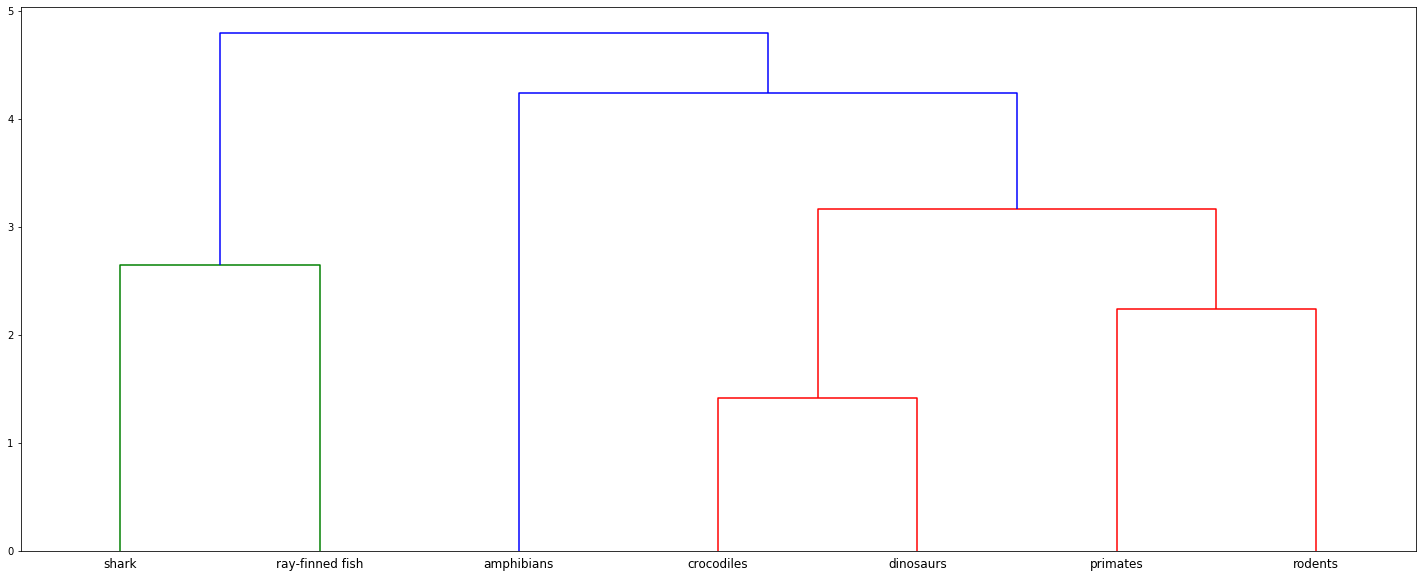

In [138]:
# Example borrowed from INF283 taught at the university of Bergen autumn 2018

data = [ "ATGTAAA" , "ATGAAAA" , "ACGTGAA" , "ACGAGGG" , "ACGAGGA" , "ACGAGTC" , "ACGAGCC" ]
labels = [ "shark" , "ray-finned fish" , "amphibians" , "primates" , "rodents" , "crocodiles" , "birds" ]

# The levenshtein distance matrix ->
mat = np.zeros(( len (data), len (data)), dtype = int )
for i in range ( 0 , len (data)):
    for j in range ( 0 , len (data)):
        mat[i][j] = levenshtein(data[i], data[j])
        print (mat[i][j], end = "" )
    print ( " \n " )
    
    
mat = pdist(mat) # make an upper triangle matrix
z = hierarchy.linkage(mat)


fig = plt.figure( figsize =( 25 , 10 ))
dn = hierarchy.dendrogram(z, labels=labels)
plt.show()

It should be mentioned that these AA sequences were chosen to be particularly convenient and give the right answer of descent. 

### Extra exercise: go to UniProt, and decide upon a particular gene/protein of choice. Find the homologue of this gene in a couple of species, and perform hierarchical clustering on it.

Tip: select a short (5-15) sequence which is not conserved between species.

### Summary of hierarchical clustering

1. Decide upon a similarity metric, calculate distance matrix
2. Apply clustering algorithm on matrix
3. Plot dendrogram for visualization
4. Decide upon a suitable number of clusters and extract them



# Extra: A few more clustering algorithms

## Gaussian mixture models (GMM)
GMMs work by the assumption that the clusters are sampled from a (multivariate) normal distribution, thus being a little more flexible than Kmeans. GMMs are an example of the expectation-maximization (EM) class of models, which is an iterative process, not unlike that of KMeans.

Below are a few examples where GMMs outperform KMeans.

In [139]:
from sklearn.mixture import GaussianMixture as GMM

In [156]:
# Anisotropicly distributed data
random_state = 3
X, y = make_blobs(n_samples=300, random_state=random_state)
A = [[-.7, .3],
    [5, -.8]]
X_aniso = X@A
X, y = (X_aniso, y)
X = scaler.fit_transform(X)

#### Non-circular clusters

Text(0.5, 1.0, 'Gaussian Mixture Model')

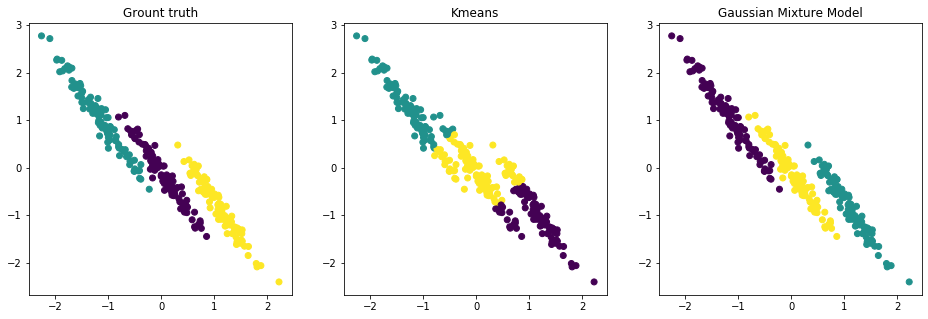

In [157]:
fig = plt.figure(figsize=[16,5])

ax = fig.add_subplot(131)
ax.scatter(X[:,0], X[:,1], c=y)
plt.title('Grount truth')  
    
pred = KMeans(3).fit_predict(X)
ax = fig.add_subplot(132)
ax.scatter(X[:,0], X[:,1], c=pred)
plt.title('Kmeans')

pred = GMM(3).fit_predict(X)
ax = fig.add_subplot(133)
ax.scatter(X[:,0], X[:,1], c=pred)
plt.title('Gaussian Mixture Model')

#### Unequal spread between clusters

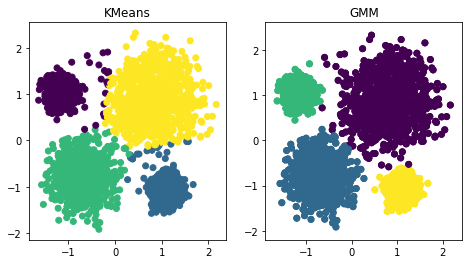

In [158]:
np.random.seed(844)
clust1 = np.random.normal(5, 2, (1000,2))
clust2 = np.random.normal(15, 3, (1000,2))
clust3 = np.random.multivariate_normal([17,3], [[1,0],[0,1]], 1000)
clust4 = np.random.multivariate_normal([2,16], [[1,0],[0,1]], 1000)
X = np.concatenate((clust1, clust2, clust3, clust4))
X = scaler.fit_transform(X)

def scatter(X, y=None, ax=plt):
    ax.scatter(X[:,0], X[:,1], c=y)

fig = plt.figure(figsize=[12,4])
ax = fig.add_subplot(131)
pred = KMeans(4).fit_predict(X)
scatter(X, pred)
plt.title('KMeans')

ax = fig.add_subplot(132)
pred = GMM(4).fit_predict(X)
scatter(X, pred)
plt.title('GMM')

scatter(X, pred)

#### Overlapping clusters

Text(0.5, 1.0, 'Ground truth')

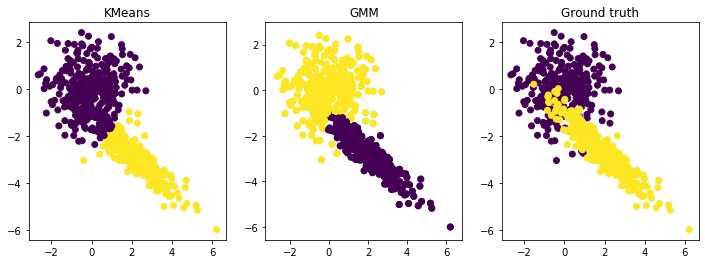

In [159]:
np.random.seed(0)
c1 = np.random.multivariate_normal([0,0], [[1,0],[0,1]], 300)
c2 = np.random.multivariate_normal([-1,-3], [[1,0],[0,1]], 300)
c2=c2@[[1,-.5],[-.9,1]]
X = np.concatenate((c1,c2))
y = np.concatenate([np.zeros(300), np.ones(300)])

fig = plt.figure(figsize=[12,4])
ax = fig.add_subplot(131)
pred = KMeans(2).fit_predict(X)
scatter(X, pred)
plt.title('KMeans')

ax = fig.add_subplot(132)
pred = GMM(2).fit_predict(X)
scatter(X, pred)
plt.title('GMM')
scatter(X, pred)

ax = fig.add_subplot(133)
scatter(X, y)
plt.title('Ground truth')


As we can see, Kmeans seem to fail in a number of instances, by assuming circular clusters of equal spread and no overlap. That is not to say that GMMs are always superior, and has no drawbacks.

## More about  Expectation Maximisation (EM)

This technique is the application of the [general expectation maximisation (EM) algorithm](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm) to the task of clustering. It is conceptually related and visually similar to k-means (see GIF below). Where k-means seeks to minimise the distance between the observations and their assigned centroids, EM estimates some latent variables (typically the mean and covariance matrix of a mutltinomial normal distribution (called [Gaussian Mixture Models (GMM)](http://scikit-learn.org/stable/modules/mixture.html))), so as to maximise the log-likelihood of the observed data. Similar to k-means, the algorithm converges to the final clustering by iteratively improving its performance (i.e. reducing the log-likelihood). However, again like k-means, there is no guarantee that the algorithm has settled on the global minimum rather than local minimum (a concern that increases in higher dimensions).

![title](assets/em-only.gif)

In contrast to kmeans, observations are not explicitly assigned to clusters, but rather given probabilities of belonging to each distribution. If the underlying distribution is correctly identified (e.g. normal distribution in the GIF), then the algorithm performs well. In practice, especially for large datasets, the underlying distribution may not be retrievble, so EM clustering may not be well suited to such tasks.


## DBSCAN

[Density-based spatial clustering of applications with noise](https://en.wikipedia.org/wiki/DBSCAN) (DBSCAN) is a density based clustering algorithm that can neatly handle noise (the clue is in the name). Clusters are considered zones that are sufficiently dense. Points that lack neighbours do not belong to any cluster and are thus classifed as noise (a state that is not immediately attainable under traditional k-means or HC). DBSCAN doesn't require the user to specify the number of clusters; it works that out for you. Instead, the user must define the minimum number of observations that constitutes a cluster (`minPts`) and the size of the neighbourhoods (epsilon - often denoted as `eps` or $\epsilon$). In simple terms, DBSCAN identifies clusters and then expands those clusters by scanning the neighbourhoods of the assigned points. Once all neighbourhoods have been exhausted, the process repeats with a new cluster, until all observations belong to a segment or have been classified as noise (see GIF below).

![title](./assets/DBSCAN_tutorial.gif)

The most obvious advantage of DBSCAN is that the user doesn't need to specify the number of clusters. Also, as already stated, the ability to robustly treat outliers as noise distinguishes it from other techniques. Finally, being density based, DBSCAN can return clusters of any shape.

Wow! It managed to correctly segment `Dataset2` without knowing number of clusters beforehand. But before you throw k-means in the bin and get a DBSCAN tattoo ([a google image search returned nothing interesting](https://www.google.co.uk/search?q=dbscan+tattoo&safe=off&source=lnms&tbm=isch&sa=X&ved=0ahUKEwjbvJWFz_vRAhUBWhoKHTOrCsAQ_AUICCgB&biw=1600&bih=794)), DBSCAN does have its flaws too. In rare cases, border points can flip between clusters, depending on the order by which the data is processed, meaning different executions can return different outputs. Like all clustering techniques discussed in this tutorial, DBSCAN suffers from the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality) - distance functions become less meaningful in higher dimensions, as all points are 'far away' from each other. For similar reasons, it can be hard to determine the appropriate values of epsilon and minPts (though trial and error will usually suffice in 2 dimensions - see below GIF).

![alt-text-2](./assets/DBSCAN_search.gif)

But these concerns are either minor or not unique to DBSCAN. A much bigger issue arises if the clusters exhibit varying density. In such cases, it may be impossible to find a decent epsilon value, as one single value can't perform well on each cluster. This is where [OPTICS](https://en.wikipedia.org/wiki/OPTICS_algorithm) (Ordering points to identify the clustering structure) would come in. Unfortunately, OPTICS isn't currently available in Scikit learn, [though there is a nearly 4 year old (active!) pull request open on github](https://github.com/scikit-learn/scikit-learn/pull/1984). There's also an extension of DBSCAN called [HDBSCAN](http://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html) (where the 'H' stands for Hierarchical, as it incorporates HC). [It overcomes some of DBSCAN traditional faults](http://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html). However, it's also currently not included in scikit (though there is an [extensively documented python package on github](https://github.com/scikit-learn-contrib/hdbscan)).


- [Spectral Clustering](https://en.wikipedia.org/wiki/Spectral_clustering) - `from sklearn.cluster import SpectralClustering`

### Visualizing K-Means Clusters in N Dimensions

What if you are clustering over more than 3 columns? How do you visualize that? One common approach is to split the 4th dimension data into groups and plot a 3D graph for each of those groups. Another approach is to split all the data into groups based on the K-means cluster value, then apply an aggregation function such as sum or average to all the dimensions in that group, then plot those aggregate values in a heatmap. This approach is described in the following:

We produce an artificial dataset with 12 feature columns to simulate a dataset in which each experimental unit (data point) have been characterized by a variety of attributes, such as different measurements. By plotting the K-means cluster groups and feature columns in a heatmap we can illustrate how we can use machine learning to categorize such a dataset into groups. This in order to obtain better insight to complex data without any prior model of the data generating mechanisms.

In [160]:
import pandas as pd
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()

In [161]:
def rename_columns(df, prefix='x'):
    """
    Rename the columns of a dataframe to have X in front of them

    :param df: data frame we're operating on
    :param prefix: the prefix string
    """
    df = df.copy()
    df.columns = [prefix + str(i) for i in df.columns]
    return df

In [162]:
from sklearn.datasets import make_classification, make_regression

# create an artificial dataset with 100 samples from 4 clusters and with 12 features
X, Y = make_classification(n_samples=100, n_classes=4, n_features=12, n_redundant=0, n_informative=12,
                             scale=1000, n_clusters_per_class=1)
df = pd.DataFrame(X)
# ensure all values are positive (this is needed for our medical example)
df = df.abs()
# rename X columns
df = rename_columns(df)
# and the Y
df['y'] = Y
df.head(3).round(2)

x0       x1       x2       x3       x4       x5       x6       x7  \
0  2390.40  1178.75  1395.41   771.41  1238.30   338.91  5217.94  1552.08   
1   371.87   296.61  1665.75  1210.66  2101.91   647.58  1595.92  5228.08   
2  1730.64  7125.33   817.76   795.82  1612.43  1507.16  1562.12   246.90   

        x8       x9      x10      x11  y  
0  3958.84  5393.53  1431.79   120.05  1  
1  4045.13  1824.90  1262.98  1339.81  0  
2   236.97  4429.59  2352.27  2220.64  2

In [163]:
# split df into cluster groups
grouped = df.groupby(['y'], sort=True)

# compute sums for every column in every group
print('y = 0,1,2,3 denote group; x0, ... , x11 denote feature; entries are the grouped sum:')
sums = grouped.sum()
sums.round(2)

y = 0,1,2,3 denote group; x0, ... , x11 denote feature; entries are the grouped sum:


x0        x1        x2        x3        x4        x5        x6  \
y                                                                         
0  32381.46  50168.96  42701.95  50862.97  37725.47  54031.19  42027.85   
1  50200.18  42512.26  48546.15  33391.20  41962.96  80145.15  44225.87   
2  50468.48  58686.61  35404.42  26570.54  54699.25  53990.36  34505.13   
3  39038.23  54789.57  41209.36  44120.12  48668.71  32784.48  46902.69   

         x7        x8        x9       x10       x11  
y                                                    
0  50804.88  37384.19  35060.30  39892.65  59082.40  
1  31507.71  41468.15  59579.88  32738.38  60997.36  
2  43162.41  49437.15  45048.48  51161.48  48897.18  
3  39888.89  50820.35  41219.69  60627.57  53125.72

In [164]:
data = [go.Heatmap( z=sums.values.tolist(), 
                   y=['Group A', 'Group B', 'Group C', 'Group D'],
                   x=['Alanine aminotransferase (ALAT)',
                      'Albumin',
                      'Amylase (pancreatic)',
                      'Aspartate aminotransferase (ASAT)',
                      'Calcium',
                      'Cholesterol',
                      'Creatin Kinase (CK)',
                      'Chloride',
                      'C-reactive protein (CRP)',
                      'Creatinine',
                      'Iron',
                      'Glucose',
                      'Potassium',
                      'Lactate dehydrogenase'
                     ],
                   colorscale='Viridis')]

plotly.offline.iplot(data, filename='pandas-heatmap')